In [4]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
key='65c0d841cd60030345442b10d9654702a6633001'
df=pdr.get_data_tiingo('GOOG',api_key=key)

In [6]:
df.to_csv('GOOG.csv')

In [7]:
df=pd.read_csv('GOOG.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2015-07-20 00:00:00+00:00,663.02,668.88,653.01,659.24,5860872,663.02,668.88,653.01,659.24,5860872,0.0,1.0
1,GOOG,2015-07-21 00:00:00+00:00,662.30,673.00,654.30,655.21,3377196,662.30,673.00,654.30,655.21,3377196,0.0,1.0
2,GOOG,2015-07-22 00:00:00+00:00,662.10,678.64,659.00,660.89,3929309,662.10,678.64,659.00,660.89,3929309,0.0,1.0
3,GOOG,2015-07-23 00:00:00+00:00,644.28,663.63,641.00,661.27,3029109,644.28,663.63,641.00,661.27,3029109,0.0,1.0
4,GOOG,2015-07-24 00:00:00+00:00,623.56,648.17,622.52,647.00,3625747,623.56,648.17,622.52,647.00,3625747,0.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,GOOG,2020-07-13 00:00:00+00:00,1511.34,1577.13,1505.24,1550.00,1846400,1511.34,1577.132,1505.243,1550.00,1846400,0.0,1.0
1255,GOOG,2020-07-14 00:00:00+00:00,1520.58,1522.95,1483.50,1490.31,1585000,1520.58,1522.950,1483.500,1490.31,1585000,0.0,1.0
1256,GOOG,2020-07-15 00:00:00+00:00,1513.64,1535.33,1498.00,1523.13,1761000,1513.64,1535.330,1498.000,1523.13,1761000,0.0,1.0
1257,GOOG,2020-07-16 00:00:00+00:00,1518.00,1518.69,1486.31,1500.00,1519300,1518.00,1518.690,1486.310,1500.00,1519300,0.0,1.0
1258,GOOG,2020-07-17 00:00:00+00:00,1515.55,1523.44,1498.42,1521.62,1442000,1515.55,1523.440,1498.420,1521.62,1442000,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1.shape

(1259,)

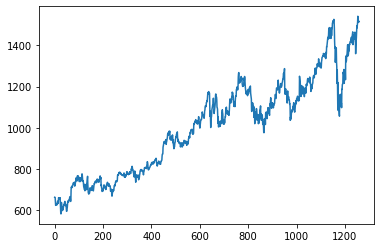

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(1259, 1)

In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(818, 441)

In [20]:
train_data

array([[0.08436145],
       [0.0836112 ],
       [0.0834028 ],
       [0.06483411],
       [0.04324358],
       [0.04709903],
       [0.04787012],
       [0.05196524],
       [0.05265297],
       [0.04537971],
       [0.05121499],
       [0.04917264],
       [0.0643131 ],
       [0.06316689],
       [0.05547683],
       [0.05384086],
       [0.08202734],
       [0.08075609],
       [0.07751542],
       [0.07821357],
       [0.08212112],
       [0.07718198],
       [0.08215238],
       [0.06749125],
       [0.03169807],
       [0.00786721],
       [0.        ],
       [0.04851617],
       [0.05788388],
       [0.05035012],
       [0.03771049],
       [0.01639088],
       [0.03363621],
       [0.02520632],
       [0.01942314],
       [0.03396966],
       [0.03194815],
       [0.04094073],
       [0.04554643],
       [0.04291014],
       [0.0553101 ],
       [0.0561854 ],
       [0.06339613],
       [0.04917264],
       [0.05562271],
       [0.04233703],
       [0.04199316],
       [0.045

In [24]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [25]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [26]:
print(X_train)

[[0.08436145 0.0836112  0.0834028  ... 0.19251209 0.18880252 0.18788555]
 [0.0836112  0.0834028  0.06483411 ... 0.18880252 0.18788555 0.17667347]
 [0.0834028  0.06483411 0.04324358 ... 0.18788555 0.17667347 0.17443314]
 ...
 [0.50464738 0.51842281 0.50815897 ... 0.59946024 0.59072816 0.58015172]
 [0.51842281 0.50815897 0.51853743 ... 0.59072816 0.58015172 0.52013171]
 [0.50815897 0.51853743 0.51806852 ... 0.58015172 0.52013171 0.51815188]]


In [28]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [29]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()

In [33]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0505 - val_loss: 0.0493
Epoch 2/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 3/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0038 - val_loss: 0.0092
Epoch 4/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 5/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 6/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 7/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 8/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 9/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 10/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0011 - val_lo

In [37]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

925.9430269114795

In [42]:
math.sqrt(mean_squared_error(y_test,test_predict))

1257.9130345899302

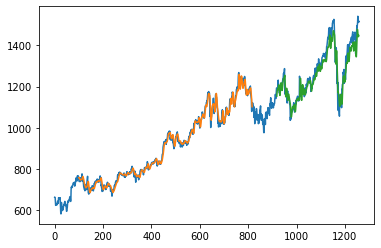

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:

temp_input

[0.8451983994664888,
 0.7669535678559519,
 0.789085945315105,
 0.840957402467489,
 0.7912324941647216,
 0.8382585861953985,
 0.7679434811603868,
 0.7464467322440814,
 0.6601158719573191,
 0.7276696398799601,
 0.6599595698566191,
 0.5552371623874627,
 0.6644610703567856,
 0.5233723741247082,
 0.5603326108702901,
 0.5363662887629209,
 0.5556331277092365,
 0.5108577859286428,
 0.4944981660553517,
 0.5756085361787263,
 0.5422953484494831,
 0.604045098366122,
 0.550860703567856,
 0.5884878292764254,
 0.6051496332110703,
 0.5455568522840947,
 0.561416305435145,
 0.5374916638879629,
 0.6302725908636212,
 0.6298453651217072,
 0.6546140380126709,
 0.6558331943981327,
 0.6621998999666555,
 0.7160407635878626,
 0.7089967489163055,
 0.7100387629209738,
 0.7306497999333111,
 0.7133106868956317,
 0.6609286428809603,
 0.7097678392797601,
 0.7234182227409135,
 0.7265442647549182,
 0.7229701567189065,
 0.6789867455818607,
 0.7913262754251417,
 0.7988079359786596,
 0.7695794431477158,
 0.776029509836612

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9205237]
101
1 day input [0.76695357 0.78908595 0.8409574  0.79123249 0.83825859 0.76794348
 0.74644673 0.66011587 0.72766964 0.65995957 0.55523716 0.66446107
 0.52337237 0.56033261 0.53636629 0.55563313 0.51085779 0.49449817
 0.57560854 0.54229535 0.6040451  0.5508607  0.58848783 0.60514963
 0.54555685 0.56141631 0.53749166 0.63027259 0.62984537 0.65461404
 0.65583319 0.6621999  0.71604076 0.70899675 0.71003876 0.7306498
 0.71331069 0.66092864 0.70976784 0.72341822 0.72654426 0.72297016
 0.67898675 0.79132628 0.79880794 0.76957944 0.77602951 0.80136087
 0.7973908  0.82371207 0.84018631 0.8557019  0.82702568 0.79950609
 0.80659178 0.82436854 0.83557019 0.82467072 0.85930727 0.85522257
 0.86316272 0.87004001 0.87089446 0.86973783 0.88243998 0.88546182
 0.89317272 0.8902134  0.86499667 0.89230785 0.90087321 0.91082444
 0.92092156 0.85630627 0.86603868 0.87298891 0.89681977 0.90557269
 0.88977576 0.88535762 0.90634378 0.91942106 0.88561812 0.89537137
 0.81052017 0.8470636  0.86648675 0

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
len(df1)

1259

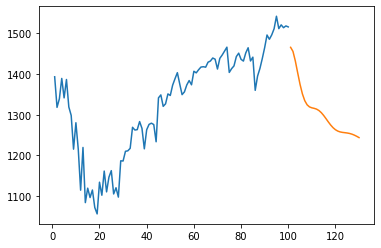

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

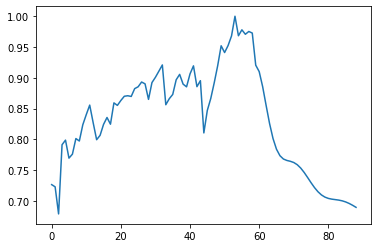

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

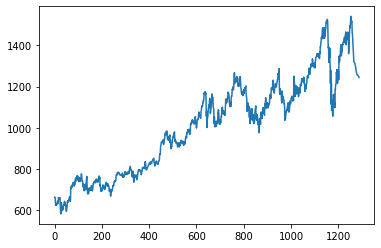

In [52]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)